In [ ]:
import pandas as pd
import numpy as np
#matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [ ]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv")
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [ ]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [ ]:
df.dtypes

Date                        object
Year                         int64
Month                       object
Recession                    int64
Consumer_Confidence        float64
Seasonality_Weight         float64
Price                      float64
Advertising_Expenditure      int64
Competition                  int64
GDP                        float64
Growth_Rate                float64
unemployment_rate          float64
Automobile_Sales           float64
Vehicle_Type                object
City                        object
dtype: object

# **Creating Visualizations for Data Analysis**

### **TASK 1.1: Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year**

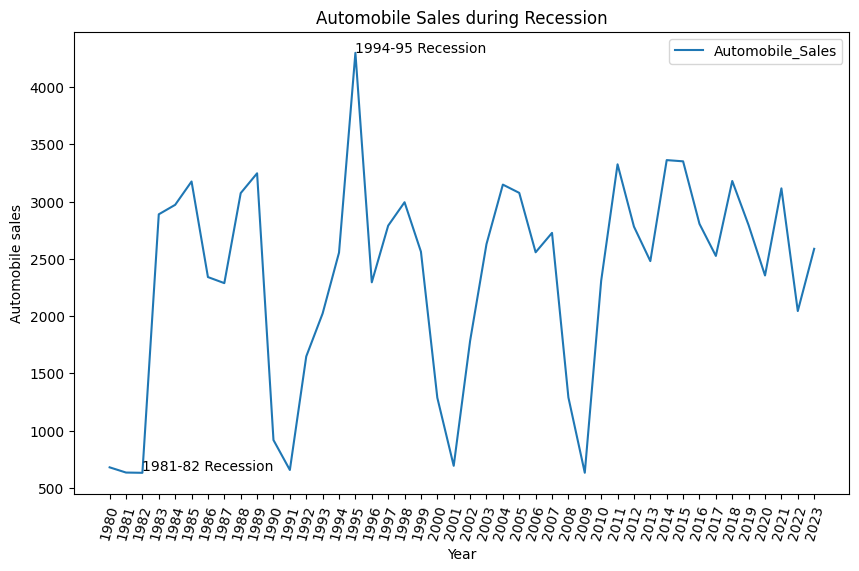

In [ ]:
df_line=df.groupby(df['Year'])['Automobile_Sales'].mean()

plt.figure(figsize=(10,6))
df_line.plot(kind='line')
plt.xticks(list(range(1980,2024)),rotation=75)
plt.ylabel('Automobile sales')
plt.xlabel('Year')
plt.title('Automobile Sales during Recession')
plt.text(1982,650,'1981-82 Recession')
plt.text(1995,4300,'1994-95 Recession')
plt.legend()
plt.show()

### **TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?**

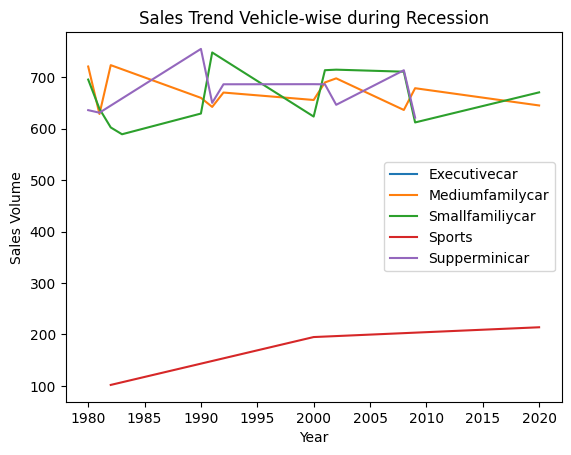

In [ ]:
df_rec=df[df['Recession']==1]
df_Mline=df_rec.groupby(['Year','Vehicle_Type'],as_index=False)['Automobile_Sales'].mean()
df_Mline.set_index('Year',inplace=True)
df_Mline=df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
df_Mline.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend()
plt.show()

#From this plot, we can understand that during recession period, the sales for 'Sports type vehicles' declined because of the high cost of the vehicle.
# while sales of the superminicar and smallfamilycar increased.

### TASK 1.3: Use the functionality of **Seaborn Library** to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

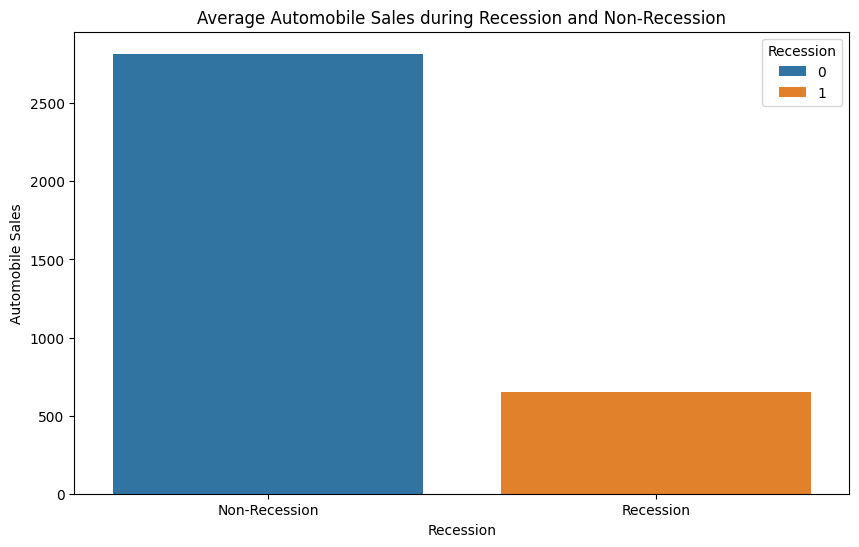

In [ ]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession',  data=new_df)
plt.xlabel('Recession')
plt.ylabel('Automobile Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

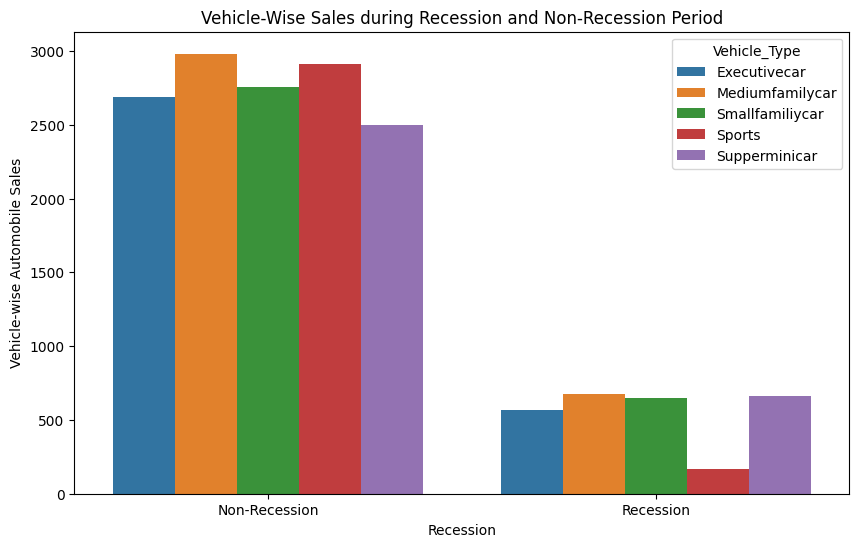

In [ ]:
recession_data = df[df['Recession'] == 1]

dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Recession')
plt.ylabel('Vehicle-wise Automobile Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

plt.show()

### **TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.**

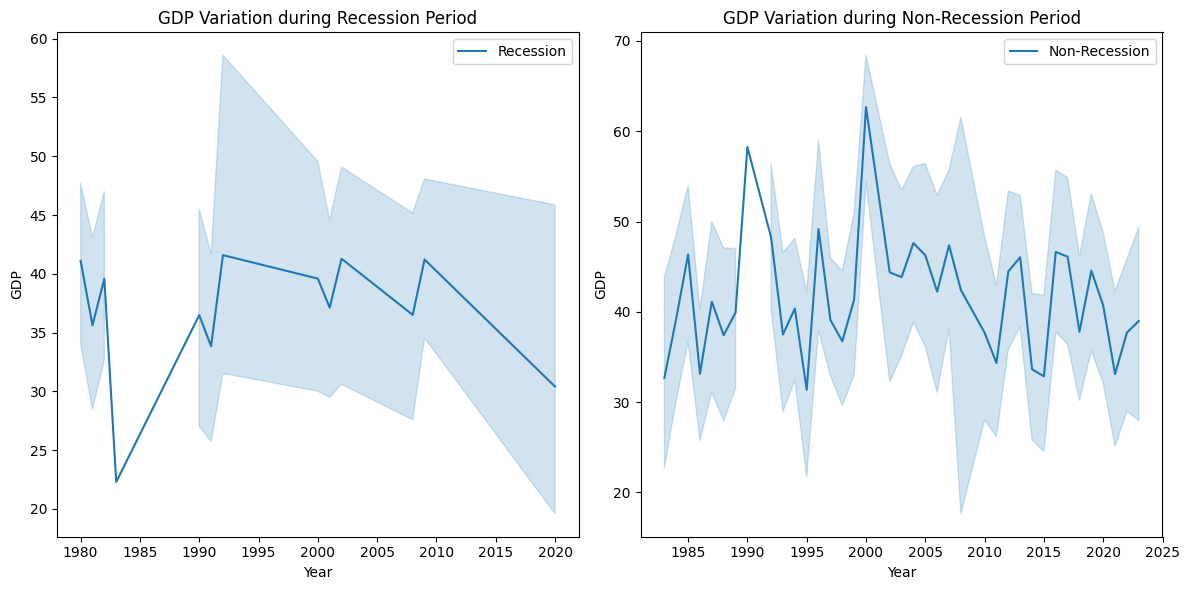

In [ ]:
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

#Figure
fig=plt.figure(figsize=(12, 6))

#Create different axes for subploting
ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2 ,2 ) # add subplot 2 (1 row, 2 columns, second plot).

#plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

#plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession',ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')

plt.tight_layout()
plt.show()

### **TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.**

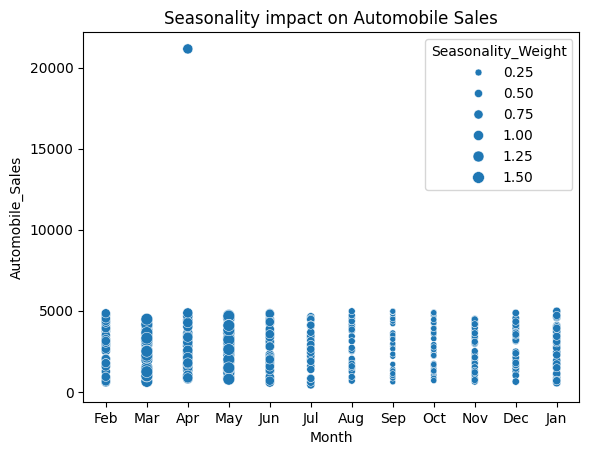

In [ ]:
non_rec_data = df[df['Recession'] == 0]

size=non_rec_data['Seasonality_Weight'] #for bubble effect

sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size)

#you can further include hue='Seasonality_Weight', legend=False)

plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()

### **TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.**

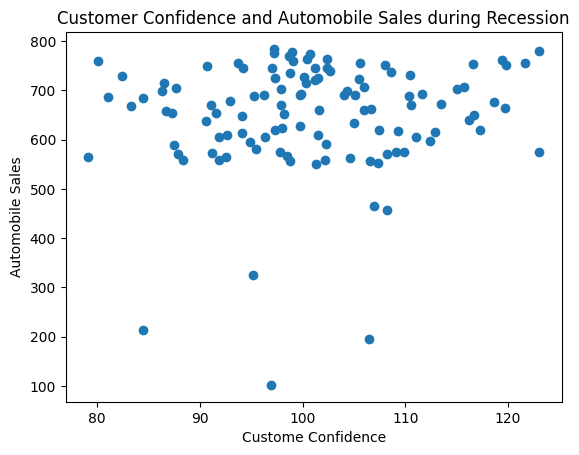

In [ ]:
rec_data = df[df['Recession'] == 1]
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])

plt.xlabel('Custome Confidence')
plt.ylabel('Automobile Sales')
plt.title('Customer Confidence and Automobile Sales during Recession')
plt.show()

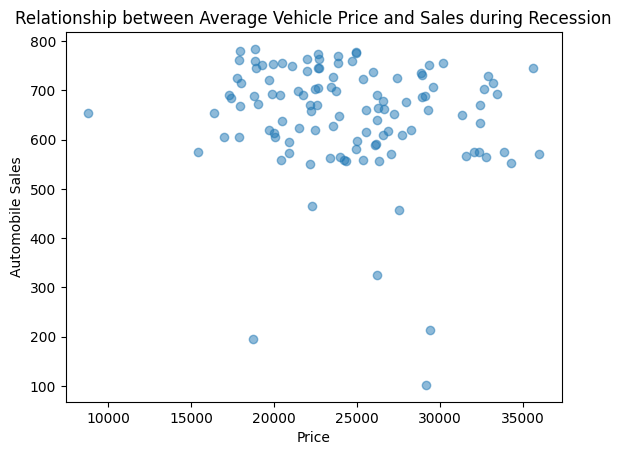

In [ ]:
rec_data = df[df['Recession'] == 1]
plt.scatter(recession_data['Price'], rec_data['Automobile_Sales'],alpha=0.5)

plt.xlabel('Price')
plt.ylabel('Automobile Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recession')
plt.show()

### **TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.**

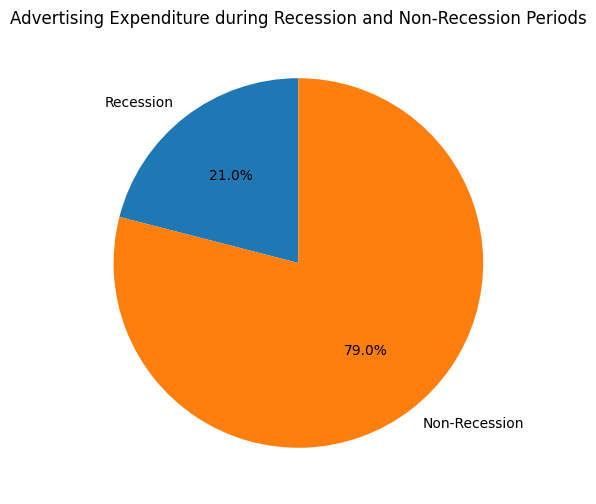

In [ ]:
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

# Calculate the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

# Create a pie chart for the advertising expenditure
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertising Expenditure during Recession and Non-Recession Periods')

plt.show()

### **TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.**

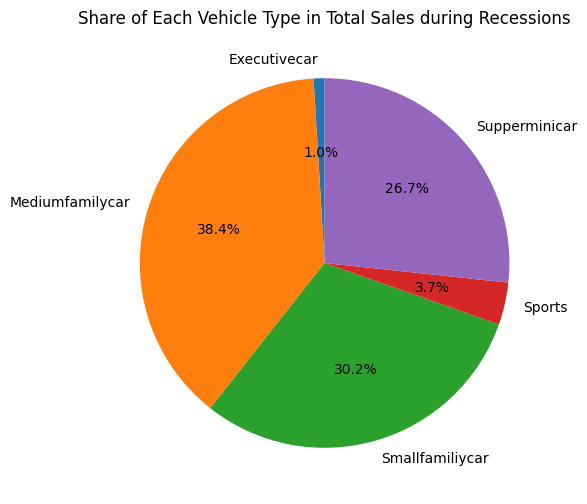

In [ ]:
Rdata = df[df['Recession'] == 1]

# Calculate the sales volume by vehicle type during recessions
VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create a pie chart for the share of each vehicle type in total expenditure during recessions
plt.figure(figsize=(10, 6))

labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Share of Each Vehicle Type in Total Sales during Recessions')

plt.show()

### **TASK 1.9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.**

<ipython-input-41-8e07e25a61ab>:2: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_rec, x='unemployment_rate',y='Automobile_Sales',


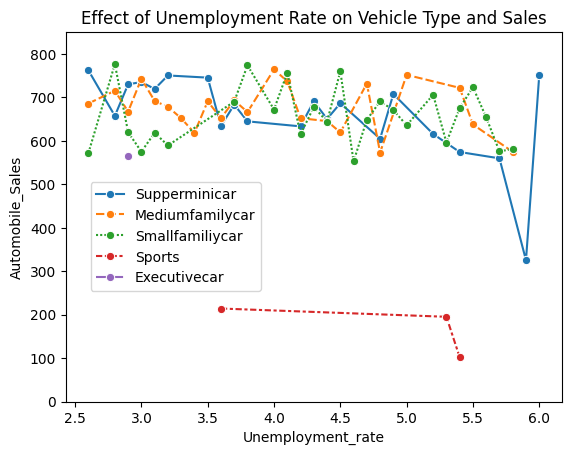

In [ ]:
df_rec = df[df['Recession']==1]
sns.lineplot(data=df_rec, x='unemployment_rate',y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)
plt.xlabel('Unemployment_rate')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.ylim(0,850)
plt.legend(loc=(0.05,.3))

 ### **TASK 1.10 Create a map on the hightest sales region/offices of the company during recession period**

In [ ]:
pip install aiofiles

In [ ]:
import aiohttp
import aiofiles

async def download(url, filename):
    async with aiohttp.ClientSession() as session:
        async with session.get(url) as response:
            if response.status == 200:
                async with aiofiles.open(filename, 'wb') as f:
                    await f.write(await response.read())

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
await download(path, "us-states.json")

filename = "us-states.json"

In [ ]:
recession_data = df[df['Recession'] == 1]

# Calculate the total sales by city
sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

# Create a base map centered on the United States
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Create a choropleth layer using Folium
choropleth = folium.Choropleth(
    geo_data='us-states.json',  # GeoJSON file with state boundaries
    data=sales_by_city,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession'
).add_to(map1)

# Add tooltips to the choropleth layer
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
)

map1

### **TASK 2.1: Create a Dash application and give it a meaningful title**

In [ ]:
import pandas as pd
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output, State
import plotly.graph_objects as go
import plotly.express as px
from dash import no_update

ModuleNotFoundError: No module named 'dash'

In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/InaFqKi-TlmTZwlzKvlNaQ/DV0101EN-Final-Assign-Part-2-Questions.py

--2024-08-06 11:28:38--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/InaFqKi-TlmTZwlzKvlNaQ/DV0101EN-Final-Assign-Part-2-Questions.py
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6813 (6.7K) [application/x-python]
Saving to: ‘DV0101EN-Final-Assign-Part-2-Questions.py’

DV0101EN-Final-Assi 100%[===================>]   6.65K  --.-KB/s    in 0s      

2024-08-06 11:28:38 (1.53 GB/s) - ‘DV0101EN-Final-Assign-Part-2-Questions.py’ saved [6813/6813]



In [ ]:
pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 20.3 MB/s eta 0:00:00


In [ ]:
#!/usr/bin/env python
# coding: utf-8

# In[ ]:


import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output, State
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px

# Load the data using pandas
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv')

# Initialize the Dash app
app = dash.Dash(__name__)

# Set the title of the dashboard
app.title = "Automobile Statistics Dashboard"

#---------------------------------------------------------------------------------
# Create the dropdown menu options
dropdown_options = [
    {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
    {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}
]
# List of years
year_list = [i for i in range(1980, 2024, 1)]
#---------------------------------------------------------------------------------------
# Create the layout of the app
app.layout = html.Div([
    #TASK 2.1 Add title to the dashboard
    html.H1("Automobile Sales Statistics Dashboard",
            style={ 'textAlign': 'center',
                    'color': '#503D36',
                    'font-size': 24}),
    html.Div([#TASK 2.2: Add two dropdown menus
        html.Label("Select Statistics:"),
        dcc.Dropdown(
            id='dropdown-statistics',
            options=dropdown_options,
            value='Select Statistics',
            placeholder='Select a report type'
        )
    ]),
    html.Div(dcc.Dropdown(
            id='select-year',
            options=[{'label': i, 'value': i} for i in year_list],
            value='Select Year'
        )),
    html.Div([#TASK 2.3: Add a division for output display
        html.Div(id='output-container', className='chart-grid', style={'display':'flex'})
        ])
])
#TASK 2.4: Creating Callbacks
# Define the callback function to update the input container based on the selected statistics
@app.callback(
    Output(component_id='select-year', component_property='disabled'),
    Input(component_id='dropdown-statistics',component_property='value'))

def update_input_container(selected_statistics):
    if selected_statistics =='Yearly Statistics':
        return False
    else:
        return True

#Callback for plotting
# Define the callback function to update the input container based on the selected statistics
@app.callback(
    Output(component_id='output-container', component_property='children'),
    [Input(component_id='select-year', component_property='value'),
    Input(component_id='dropdown-statistics', component_property='value')])


def update_output_container(input_year, selected_statistics):
    if selected_statistics == 'Recession Period Statistics':
        # Filter the data for recession periods
        recession_data = data[data['Recession'] == 1]

#TASK 2.5: Create and display graphs for Recession Report Statistics

#Plot 1 Automobile sales fluctuate over Recession Period (year wise)
        # use groupby to create relevant data for plotting
        yearly_rec=recession_data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        R_chart1 = dcc.Graph(
            figure=px.line(yearly_rec,
                x='Year',
                y='Automobile_Sales',
                title="Average Automobile Sales fluctuation over Recession Period").update_layout(
                xaxis_title='Year',
                yaxis_title='Number of Automobiles Sold',
                title_x=0.5
                ))

#Plot 2 Calculate the average number of vehicles sold by vehicle type
        # use groupby to create relevant data for plotting
        average_sales = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
        R_chart2  = dcc.Graph(
            figure=px.bar(average_sales,
                x='Vehicle_Type',
                y='Automobile_Sales',
                title="Average Automobile Sales fluctuation by Vehicle Type over Recession Period").update_layout(
                xaxis_title='Vehicle Type',
                yaxis_title='Number of Automobiles Sold',
                title_x=0.5
                ))

# Plot 3 Pie chart for total expenditure share by vehicle type during recessions
        # use groupby to create relevant data for plotting
        exp_rec= recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        R_chart3 = dcc.Graph(
            figure=px.pie(exp_rec,
                values='Advertising_Expenditure',
                names='Vehicle_Type',
                title="Total Expenditure by Vehicle Type during Recession").update_layout(
                title_x=0.5
                ))

# Plot 4 bar chart for the effect of unemployment rate on vehicle type and sales
        unemp = recession_data.groupby(['Vehicle_Type','unemployment_rate'], as_index=False)['Automobile_Sales'].mean().reset_index()
        R_chart4  = dcc.Graph(
            figure=px.bar(unemp,
                x='unemployment_rate',
                y='Automobile_Sales',
                color="Vehicle_Type",
                title="Effect of Unemployment Rate on Vehicle Type Sales").update_layout(
                xaxis_title='Unemployment Rate',
                yaxis_title='Number of Automobiles Sold',
                title_x=0.5
                ))

        return [
            html.Div(className='chart-item', children=[html.Div(children=R_chart1),html.Div(children=R_chart2)]),
            html.Div(className='chart-item', children=[html.Div(children=R_chart3),html.Div(children=R_chart4)])
            ]

# TASK 2.6: Create and display graphs for Yearly Report Statistics
 # Yearly Statistic Report Plots
    elif (input_year and selected_statistics=='Yearly Statistics') :
        yearly_data = data[data['Year'] == input_year]

#TASK 2.5: Creating Graphs Yearly data

#plot 1 Yearly Automobile sales using line chart for the whole period.
        yas= data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        Y_chart1 = dcc.Graph(
            figure=px.line(yas,
                x='Year',
                y='Automobile_Sales',
                title="Average Automobile Sales over Whole Period").update_layout(
                xaxis_title='Year',
                yaxis_title='Number of Automobiles Sold',
                title_x=0.5
                ))

# Plot 2 Total Monthly Automobile sales using line chart.
        mas= data.groupby('Month')['Automobile_Sales'].mean().reset_index()
        Y_chart2 = dcc.Graph(
            figure=px.line(mas,
                x='Month',
                y='Automobile_Sales',
                title="Average Automobile Sales over Whole Period").update_layout(
                xaxis_title='Month',
                yaxis_title='Number of Automobiles Sold',
                title_x=0.5
                ))

            # Plot bar chart for average number of vehicles sold during the given year
        avr_vdata = yearly_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
        Y_chart3 = dcc.Graph(
                figure=px.bar(avr_vdata,
                x='Vehicle_Type',
                y='Automobile_Sales',
                title='Average Vehicles Sold by Vehicle Type in the year {}'.format(input_year)).update_layout(
                xaxis_title='Vehicle Type',
                yaxis_title='Number of Automobiles Sold',
                title_x=0.5
                ))

            # Total Advertisement Expenditure for each vehicle using pie chart
        exp_data = yearly_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        Y_chart4 = dcc.Graph(
            figure=px.pie(exp_data,
                values='Advertising_Expenditure',
                names='Vehicle_Type',
                title="Total Expenditure by Vehicle Type for year {}".format(input_year)).update_layout(
                title_x=0.5
                ))

#TASK 2.6: Returning the graphs for displaying Yearly data
        return [
                html.Div(className='char-item', children=[html.Div(Y_chart1),html.Div(Y_chart2)]),
                html.Div(className='char-item', children=[html.Div(Y_chart3),html.Div(Y_chart4)])
                ]

    else:
        return None

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>